In [1]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Spamclassifier.csv', encoding= 'unicode_escape')
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.shape

(4837, 2)

In [3]:
df['Label'].value_counts()

ham     4199
spam     638
Name: Label, dtype: int64

In [4]:
df['Label']=df['Label'].replace('ham', 0)
df['Label']=df['Label'].replace('spam', 1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


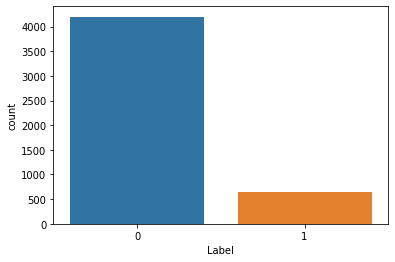

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['Label'])

In [6]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [ ]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ',df['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus

In [ ]:
lem=WordNetLemmatizer()
lem_corpus=[]

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ',df['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lem.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    lem_corpus.append(review)

lem_corpus

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X_stem = cv.fit_transform(corpus).toarray()
X_stem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
X_stem.shape

(4837, 2500)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(max_features=2500)
X_lem = cv1.fit_transform(lem_corpus).toarray()
X_lem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
X_lem.shape

(4837, 2500)

In [16]:
#TF-IDF for stemming

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_stem=tf_stem.fit_transform(corpus)
print(x_tf_stem.shape)

(4837, 6296)


In [17]:
#TF-IDF for lemmetizing
tf_lem=TfidfVectorizer()
x_tf_lem=tf_stem.fit_transform(lem_corpus)
print(x_tf_lem.shape)

(4837, 7098)


In [18]:
y=pd.get_dummies(df['Label'])
y=y.iloc[:,1].values
y


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

**Model by using countvectorizer and stemming**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_stem,y,test_size=0.2)

In [47]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)
y_pred

from sklearn.metrics import confusion_matrix
y_pred=spam_detect_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[823,   6],
       [ 10, 129]])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       829
           1       0.96      0.93      0.94       139

    accuracy                           0.98       968
   macro avg       0.97      0.96      0.97       968
weighted avg       0.98      0.98      0.98       968



**Model by using countvectorizer and lemmetizing**

In [50]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test= train_test_split(X_lem,y,test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X1_train, y1_train)
y1_pred=spam_detect_model.predict(X1_test)
y1_pred

from sklearn.metrics import confusion_matrix
y1_pred=spam_detect_model.predict(X1_test)
cm1=confusion_matrix(y1_test,y1_pred)
cm1

array([[815,  11],
       [ 10, 132]])

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       826
           1       0.92      0.93      0.93       142

    accuracy                           0.98       968
   macro avg       0.96      0.96      0.96       968
weighted avg       0.98      0.98      0.98       968



**Model by using TF-IDF and stemming**

In [55]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test= train_test_split(x_tf_stem,y,test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X2_train, y2_train)
y2_pred=spam_detect_model.predict(X2_test)
y2_pred

from sklearn.metrics import confusion_matrix
y2_pred=spam_detect_model.predict(X2_test)
cm2=confusion_matrix(y2_test,y2_pred)
cm2

array([[830,   0],
       [ 30, 108]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       830
           1       1.00      0.78      0.88       138

    accuracy                           0.97       968
   macro avg       0.98      0.89      0.93       968
weighted avg       0.97      0.97      0.97       968



**Model by using TF-IDF and lemmetizing**

In [57]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test= train_test_split(x_tf_lem,y,test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X3_train, y3_train)
y3_pred=spam_detect_model.predict(X3_test)
y3_pred

from sklearn.metrics import confusion_matrix
y3_pred=spam_detect_model.predict(X3_test)
cm3=confusion_matrix(y3_test,y3_pred)
cm3

array([[828,   0],
       [ 39, 101]])

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       828
           1       1.00      0.72      0.84       140

    accuracy                           0.96       968
   macro avg       0.98      0.86      0.91       968
weighted avg       0.96      0.96      0.96       968

